In [ ]:
One thing I've learnt in my short career in Analytics is that any initiative that used stati
I've been dabbling a lot on the stastical side of Data Science however I find 

In [ ]:
Most inferential statistics examples of

# **Independent Samples T-test**

## **Problem Statement**

Imagine you just got promoted as the VP of Sales in EZSales a fast growing CRM Provider and one of your initial task for FY 2022-23 is to review if the Segment Line's **ARRs (Annual Recurring Revenue)** are well differentiated by Prospects' Employee Size. You've found out for FY 2021-22 that the **Enterpise's Average ARR is \\$104,919 and for Major's it's $98,586.29** although Enterprise's Average ARR is higher, does this justify having two separate Segments for the Employees Range: 500 - 4999? Or it is bettter to merge the Enterpise and Majors Teams into one Team because it seems that both segments generate the same ARR?

### **EZSales Segment Lines (Employees)**

- Enterprise++: 5000+ 
- Enterprise: 3000 - 4999
- Majors: 500 - 2999
- Mid Market - 100 - 499
- SMB: 10 - 99

### **Dataset**

We'll be using a dummy samples that contain 100 ARRs of unique Accounts for each Segment (Enterprise & Majors)

### **Hypothesis Testing**

<i>**H0 (Null Hypothesis):** μ-Enterpise <= μ-Majors</i><br>
<i>**H1 (Alternative Hypothesis):** μ-Enterpise > μ-Majors</i><br>
<i>**t:** t-statistic</i><br>
<i>**SE:** Standard Error</i>

$$t = \frac{(μ_{Enterpise} -  μ_{Majors})} {SE(!) * \sqrt n} $$ <br>
$$SE(!) = \sqrt {SE_{Enterprise}^2 + SE_{Majors}^2} $$



### **Action**

Proceed with a one-tail Independent Samples T-test to see if there's statistical evidence that the higher Enterprise Mean ARR isn't purely by chance. Use **α = 0.05**<br>

In [104]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import statistics
from scipy.stats import ttest_ind

In [ ]:
enterprise_majors_arr = pd.read_excel('datasets/Enterpise_Majors_ARR.xlsx')

In [431]:
enterprise_majors_arr.head()

,Enterprise (ARR),Majors (ARR)
0,155022,144907
1,41135,71646
2,132311,79105
3,142930,32333
4,126112,105090


In [435]:
# Check the fill rate - no missing values

enterprise_majors_arr.notna().mean()

Enterprise (ARR)    1.0
Majors (ARR)        1.0
dtype: float64

In [436]:
enterprise_majors_arr.shape

(100, 2)

In [437]:
enterprise_majors_arr.describe()

,Enterprise (ARR),Majors (ARR)
count,100.000000,100.000000
mean,104919.000000,98586.290000
std,28645.100611,26665.701598
min,30000.000000,28900.000000
25%,83072.000000,84817.500000
50%,105580.000000,101012.000000
75%,124809.500000,115623.000000
max,163186.000000,165928.000000


- There are 100 ARRs for each Segment 
- The Average Enterprise ARR is slightly higher than the Average Majors ARR 
- The Enterprise ARRs are slightly more spread out than the Majors ARRs

### **T-test Assumptions**

https://www.investopedia.com/ask/answers/073115/what-assumptions-are-made-when-conducting-ttest.asp<br>

1. The first assumption made regarding t-tests concerns the scale of measurement. The assumption for a t-test is that the scale of measurement applied to the data collected follows a continuous or ordinal scale, such as the scores for an IQ test.
2. The second assumption made is that of a simple random sample, that the data is collected from a representative, randomly selected portion of the total population.
3. The third assumption is the data, when plotted, results in a normal distribution, bell-shaped distribution curve. When a normal distribution is assumed, one can specify a level of probability (alpha level, level of significance, p) as a criterion for acceptance. In most cases, a 5% value can be assumed.
4. The fourth assumption is a reasonably large sample size is used. A larger sample size means the distribution of results should approach a normal bell-shaped curve.
5.The final assumption is homogeneity of variance. Homogeneous, or equal, variance exists when the standard deviations of samples are approximately equal. 

In [430]:
enterprise_majors_arr.dtypes

Enterprise (ARR)    int64
Majors (ARR)        int64
dtype: object

array([[<AxesSubplot:title={'center':'Enterprise (ARR)'}>,
        <AxesSubplot:title={'center':'Majors (ARR)'}>]], dtype=object)

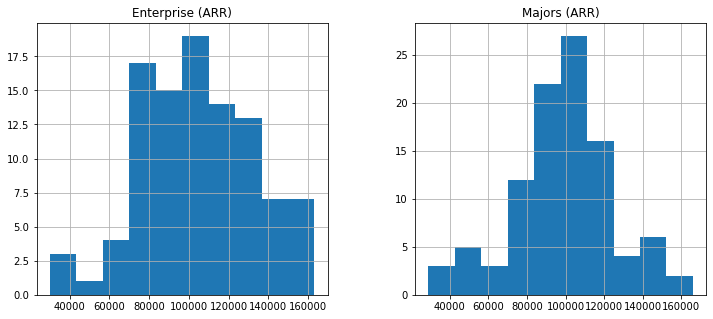

In [429]:
enterprise_majors_arr.hist(figsize=(12,5))

# **Dependent Samples T-test**

## **Problem Statement**

Sales Leaders noticed that Enterprise++ Reps have low Attaintment Rates for Q1-Q2 of FY 20 - it's around ~55%. The leadership immediately addressed this issue by coming up with a New Sales Framework (with the help of Sales and Marketing Teams) that'll be used in Q1-Q2 of FY 21 with the goal of increasing attainment rates of Enterprise++ Reps. At the end of Q1-Q2 of FY 21 the **Attainment Rates of Enterprise++ Reps increased to ~60%**. This is definitely a good news - however you want to see if this increase was attributed to the new Sales Framework to see if Enterprise++ Reps can continue using this Sales Framework. So you asked one of your Analyst to do some statistical test to confirm/reject the effectiveness of this New Sales Framework.

### **Dataset**

We'll be using dummy samples that contain 25 Attainment Rates of Enterprise++ Reps

### **Hypothesis Testing**

<i>**H0 (Null Hypothesis):** μ-fy21 - μ-fy20 = 0</i><br>
<i>**H1 (Alternative Hypothesis):** μ-fy21 - μ-fy20 > 0</i><br>
<i>**H0 ([Business Perspective]):** The increase in Attainment Rates is due to chance</i><br>
<i>**H1 ([Business Perspective]):** The increase in Attainment Rates is attributed to the New Sales Framework</i><br>
<i>**t:** t-statistic</i><br>
<i>**SE:** Standard Error</i>

$$t = \frac{(μ_{fy21} -  μ_{fy20})} {SE(!)} $$ <br>
$$SE(!) = \frac{STDDEV(μ_{fy21} -  μ_{fy20})} {\sqrt n}$$



### **Action**

Proceed with a One-Tail (positive) Dependent Samples T-test to see if there's statistical evidence that the Higher Attainment Rates for Q1-Q2 FY 21 is a result of using The new Sales Framework. Use **α = 0.05**<br>

In [291]:
from scipy.stats import ttest_rel
from scipy.stats import t

In [292]:
quota_completions = pd.read_excel('datasets/Enterpise_Quota_Completion.xlsx')

In [293]:
quota_completions.head()

,Rep,Attainment Rate (Q1-Q2 '20),Attainment Rate (Q1-Q2 '21)
0,Enterprise++ Rep 1,0.9709,1.0000
1,Enterprise++ Rep 2,0.2966,0.1099
2,Enterprise++ Rep 3,0.3565,0.8262
3,Enterprise++ Rep 4,0.0000,0.9250
4,Enterprise++ Rep 5,0.6003,0.7701


In [202]:
# Check the fill rate - no missing values

quota_completions.notna().mean()

Rep                            1.0
Attainment Rate (Q1-Q2 '20)    1.0
Attainment Rate (Q1-Q2 '21)    1.0
dtype: float64

In [203]:
quota_completions.shape

(25, 3)

In [204]:
quota_completions.describe()

,Attainment Rate (Q1-Q2 '20),Attainment Rate (Q1-Q2 '21)
count,25.000000,25.000000
mean,0.547488,0.601792
std,0.269544,0.267028
min,0.000000,0.000000
25%,0.342800,0.446500
50%,0.544700,0.594600
75%,0.692500,0.826200
max,1.000000,1.000000


- There are 25 Reps involved in this exercise 
- The Avg Attainment Rate for FY 21 is slightly higher than the Avg Attainment Rate for FY 20  
- The std_dev for Attainment Rates for FY 20 & 21 are almost the same

array([[<AxesSubplot:title={'center':"Attainment Rate (Q1-Q2 '20)"}>,
        <AxesSubplot:title={'center':"Attainment Rate (Q1-Q2 '21)"}>]],
      dtype=object)

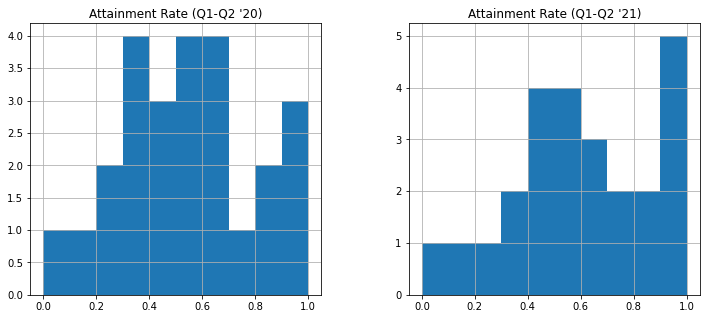

In [294]:
# Check sample normality - samples are approximately normal
quota_completions.hist(figsize=(12,5))

In [295]:
avg_attainment_20 = quota_completions["Attainment Rate (Q1-Q2 '20)"].mean()
avg_attainment_21 = quota_completions["Attainment Rate (Q1-Q2 '21)"].mean()
n = 25

In [296]:
avg_attainment_diff = avg_attainment_21 - avg_attainment_20
se = statistics.stdev((quota_completions["Attainment Rate (Q1-Q2 '21)"]
                      -  quota_completions["Attainment Rate (Q1-Q2 '20)"])) / np.sqrt(n)


t_statistic = avg_attainment_diff / se

print(f't-statistic (by-hand) = {t_statistic}')

t-statistic (by-hand) = 0.7393333763364279


In [297]:
# Check if by-hand t-statistic is the same to the Scipy Implementation

t_statistic_scipy = ttest_rel(quota_completions["Attainment Rate (Q1-Q2 '21)"],
                              quota_completions["Attainment Rate (Q1-Q2 '20)"],
                              alternative='greater')
                              
print(f't-statistic (scipy) = {t_statistic_scipy.statistic}')

t-statistic (scipy) = 0.7393333763364276


In [299]:
# t_critical threshold for α = 0.05
t_critical = t.ppf(1-0.05, df=n-1)
print(f't-critical (scipy) = {t_critical}')

t-critical (scipy) = 1.7108820799094275


### **Conclusion**

Since 0.7393 < 1.71 it suggests that we fail to reject the Null Hypothesis. Which indicates that there statistical evidence that the increase in Attainment Rates is due to chance and not because of the New Sales Framework. It's advised not to continue using this new Sales Framework in it's current state, maybe we can tweak the Sales Framework then do another round of A/B testing.

In [ ]:
scipy.stats.t.ppf(q, df)

In [250]:
se

0.07344995064214362

In [251]:
avg_attainment_diff  / se

0.7393333763364279

Ttest_relResult(statistic=0.7393333763364276, pvalue=0.23343744068318512)

In [208]:
# np.random.seed(0)
# linearity1 = np.random.standard_t(24, 25)
# np.random.seed(1)
# linearity2 = np.random.standard_t(24, 25)

# # import matplotlib.pyplot as plt
# import pandas as pd

# linearity1 = pd.DataFrame(linearity1)
# linearity2 = pd.DataFrame(linearity2)

# min_max = MinMaxScaler()

# linearity1[1] = min_max.fit_transform(linearity1[0].values.reshape(-1,1))
# linearity2[1] = min_max.fit_transform(linearity2[0].values.reshape(-1,1))

# linearity1[1] = linearity1[1].apply(lambda x:round(x, 4))
# linearity2[1] = linearity2[1].apply(lambda x:round(x, 4))

### **Dataset**

We'll be using a dummy samples that contain 100 ARRs of unique Accounts for each Segment (Enterprise & Majors)

### **Hypothesis Testing**

<i>**H0 (Null Hypothesis):** μ-Enterpise <= μ-Majors</i><br>
<i>**H1 (Alternative Hypothesis):** μ-Enterpise > μ-Majors</i><br>
<i>**t:** t-statistic</i><br>
<i>**SE:** Standard Error</i>

$$t = \frac{(μ_{Enterpise} -  μ_{Majors})} {SE(!) * \sqrt n} $$ <br>
$$SE(!) = \sqrt {SE_{Enterprise}^2 + SE_{Majors}^2} $$



### **Action**

Proceed with a one-tail Independent Samples T-test to see if there's statistical evidence that the higher Enterprise Mean ARR isn't purely by chance. Use **α = 0.05**<br>

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>]], dtype=object)

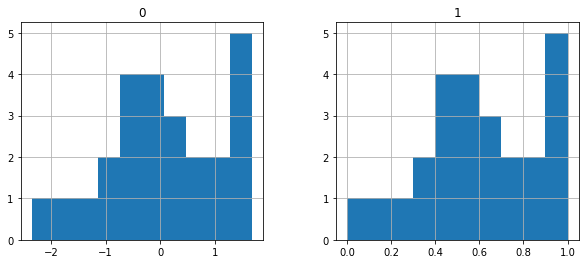

In [168]:
linearity1.hist(figsize=(10,4))

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>]], dtype=object)

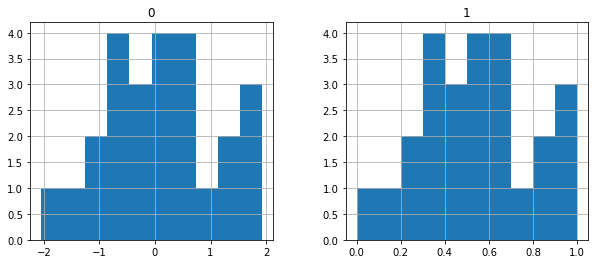

In [169]:
linearity2.hist(figsize=(10,4))

In [147]:
linearity2.describe()

,0,1
count,25.000000,25.000000
mean,0.126013,0.547488
std,1.070043,0.269544
min,-2.047454,0.000000
25%,-0.686480,0.342800
50%,0.114925,0.544700
75%,0.701672,0.692500
max,1.922420,1.000000


In [148]:
linearity1.describe()

,0,1
count,25.000000,25.000000
mean,0.076800,0.601792
std,1.081177,0.267028
min,-2.359851,0.000000
25%,-0.551892,0.446500
50%,0.047709,0.594600
75%,0.985316,0.826200
max,1.689169,1.000000


In [164]:
pd.DataFrame({"Rep" : ['Enterprise++ Rep ' + str(i) for i in range(1, 26)],
              "Quota Completion (Q1-Q2 '20)": linearity2[1].values,
              "Quota Completion (Q1-Q2 '21)": linearity1[1].values}).to_excel('datasets/Enterpise_Quota_Completion.xlsx', index=False)

In [171]:
quota_completions

,Rep,Quota Completion (Q1-Q2 '20),Quota Completion (Q1-Q2 '21)
0,Enterprise++ Rep 1,0.9709,1.0000
1,Enterprise++ Rep 2,0.2966,0.1099
2,Enterprise++ Rep 3,0.3565,0.8262
3,Enterprise++ Rep 4,0.0000,0.9250
4,Enterprise++ Rep 5,0.6003,0.7701
5,Enterprise++ Rep 6,0.3428,0.6945
6,Enterprise++ Rep 7,0.4285,0.9686
7,Enterprise++ Rep 8,0.6925,0.3549
8,Enterprise++ Rep 9,0.4654,0.0000
9,Enterprise++ Rep 10,0.9819,0.5335


In [105]:
from scipy.stats import ttest_rel

In [115]:
# Post Test, Pre Test
ttest_rel(linearity1[1],
          linearity2[1],
          alternative='greater')

Ttest_relResult(statistic=0.7259634982795125, pvalue=0.2374409040975256)

In [103]:
# linearity1
# linearity2

<AxesSubplot:>

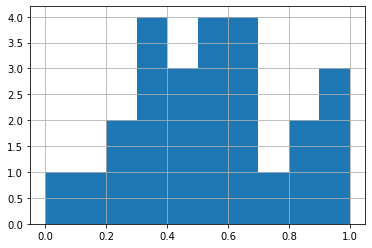

In [40]:
pd.DataFrame(min_max.fit_transform(pd.DataFrame(linearity2)[0].values.reshape(-1,1)).flatten())[0].hist()

<AxesSubplot:>

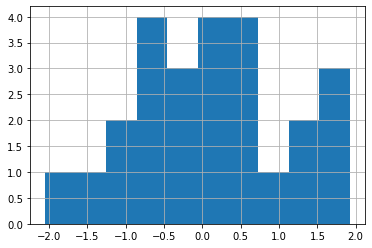

In [29]:
pd.DataFrame(linearity2)[0].hist()


In [ ]:
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler

np.random.seed(0)
# linearity1 = np.random.standard_t(24, 25)
# np.random.seed(1)
# linearity2 = np.random.standard_t(24, 25)

# # import matplotlib.pyplot as plt
# import pandas as pd

# linearity1 = pd.DataFrame(linearity1)
# linearity2 = pd.DataFrame(linearity2)

# min_max = MinMaxScaler()

# linearity1[1] = min_max.fit_transform(linearity1[0].values.reshape(-1,1))
# linearity2[1] = min_max.fit_transform(linearity2[0].values.reshape(-1,1))

# linearity1[1] = linearity1[1].apply(lambda x:round(x, 4))
# linearity2[1] = linearity2[1].apply(lambda x:round(x, 4))